In [1]:
# --- Standard imports ---
import os, sys
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from scipy.stats import boxcox, skew, kurtosis
import seaborn as sns

from config_local import local_config  # provides TRAIN_CSV, TEST_CSV, SUBMISSIONS_DIR

In [2]:
train = pd.read_csv(local_config.TRAIN_FILLED_CSV)   # e.g. data/train_filled.csv         
test = pd.read_csv(local_config.TEST_FILLED_CSV)    # e.g. data/test_filled.csv

In [3]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,<None>,Reg,Lvl,AllPub,Inside,...,0,<None>,<None>,<None>,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,<None>,Reg,Lvl,AllPub,FR2,...,0,<None>,<None>,<None>,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,<None>,IR1,Lvl,AllPub,Inside,...,0,<None>,<None>,<None>,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,<None>,IR1,Lvl,AllPub,Corner,...,0,<None>,<None>,<None>,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,<None>,IR1,Lvl,AllPub,FR2,...,0,<None>,<None>,<None>,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,<None>,Reg,Lvl,AllPub,Inside,...,0,<None>,<None>,<None>,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,<None>,Reg,Lvl,AllPub,Inside,...,0,<None>,MnPrv,<None>,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,<None>,Reg,Lvl,AllPub,Inside,...,0,<None>,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,<None>,Reg,Lvl,AllPub,Inside,...,0,<None>,<None>,<None>,0,4,2010,WD,Normal,142125


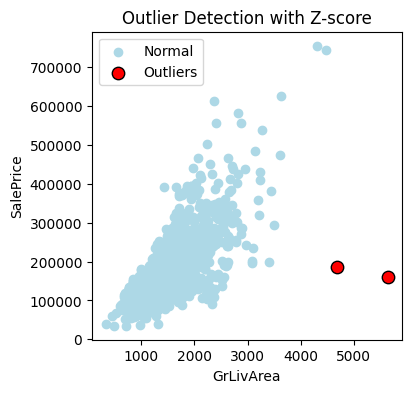

In [4]:
# Compute z-scores
z_scores = np.abs(stats.zscore(train["GrLivArea"]))
outlier_mask = (train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)#z_scores > 3  # mark outliers

# Plot all points in blue
plt.figure(figsize=(4,4))
plt.scatter(train["GrLivArea"], train["SalePrice"], c="lightblue", label="Normal")

# Overlay outliers in red
plt.scatter(train.loc[outlier_mask, "GrLivArea"], 
            train.loc[outlier_mask, "SalePrice"], 
            c="red", edgecolor="black", s=80, label="Outliers")

# plt.plot([4000, 4000], [0, 200000], color="red", linestyle="--", linewidth=2)
# plt.plot([4000, train["GrLivArea"].max()], [200000, 200000], color="red", linestyle="--", linewidth=2)

plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.legend()
plt.title("Outlier Detection with Z-score")
plt.show()

In [5]:
# # Drop rows where GrLivArea is very high and SalePrice is low
outlier_mask = (train['GrLivArea'] > 4000) & (train['SalePrice'] < 300000)
train = train.loc[~outlier_mask]

In [6]:
train.to_csv(__import__("pathlib").Path(local_config.TRAIN_OUTLIER_FILLED_CSV).resolve().parent / "train_process2.csv", index=False)